# Supervised Machine Learning
### Artificial Intelligence 1, Week 6


### Learning models for **classification** or **regression** from a set of labelled instances.

# This week
Learning outcomes:

- Identify formulate and apply the basic processes of supervised machine learning
- Understand the role of data in estimating accuracy 

Lectures:
- Basic model building process: train and test 
- Types of model: instance-based ( e.g. kNN) vs explicit (e.g. decision trees,rules, ...) 
- Example:   greedy rule induction as compared to expert system



# Machine Learning Paradigm
- Completely different paradigm to symbolic AI
- Create a system with the ability to learn
- Present the system with series of examples
- System builds up its own model of the world



<img src="figures/ML/PersonThinkingAboutDogs.png">

<img src="figures/ML/idealisedDog.png" style="float:right">

## Video (6:52): Hello World of Machine Learning Recipes


https://youtu.be/cKxRvEZd3Mw


## It's all about the data
- Computers cannot experience artefacts of the real world directly
- Instead they just deal with a few variables that represent them
- ML algorithms learn from a “training set” containing digital representations of examples to learn from
- Outcomes depend entirely on:
 - What you choose to measure
 - And how representative your training set is
 



## Example: Top Trumps for Cats and Dogs! 
<img src="figures/ML/TopTrumps.png" style= "float:right" width = 50%>

We can't put real animals into a computer!

So we have to chose some features, in this case:
 - some numerical ones (with different scales)
 - and a "free text" field
 - and an image 
 
Perhaps for animal recognition we could have had: 
   - map (geographical distribution)
   - categorical variables: [carnivore | omnivore | herbivore]  
   ...

## More formally

We have a set of *n* examples., and for each one  we have: 
- a value for each of *f* features 
- a label

The data set *X* is usually 2-D array of *n* rows and *f* columns.   
The label set *y* is usually a 1-D array with *n* entries.   
For now we'll assume the features are *continous* (e.g. floating point values)


If the label comes from a discrete unordered set of *m* values, e.g.  ("Cat", "Dog"): 
- we have a **Classification** problem.  
- We learn a model *M* that is a mapping from a *f*-dimensional continuous space (the feature values) onto a finite set
- *M*: R<sup>f</sup> --> \{1,...,m\}

If the label is an ordinal value (integer,    floating point):
- we have a **Regression** problem.
- *M*:R<sup>f</sup>->R



### Example 1:  Student marks from a previous year of the level 1 AI module
This data set has just two features: the exam mark and the average of the two parts of coursework.
We can assign an outcome knowing that to pass students need:
- an average of over 40
- and at least 35 on each part

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
grades= np.genfromtxt("data/assessment-grades-2features.csv", delimiter= ',',skip_header=1)

featureNames=("exam", "CW_mean")
nStudents = grades.shape[0]

outcomes= ("Pass","Resit Exam", "Resit Coursework","Resit Both")
simpleoutcomes= ("pass","resit")

# make target labels
result = np.empty(nStudents, dtype=np.int8)

for row in range (nStudents):
    exam = grades[row][0]
    cw   = grades[row][1]
    if (exam>=35 and cw>=35 and (exam +cw >=80) ):
        result[row] = 0 # PASS 

    elif ( cw>=40 and exam < 40):
        result[row] = 1 #resit just exam 
    elif ( cw<40 and exam>=40):
        result[row]= 2 # resit just coursework
    else:
        result[row] = 3  # resit both
        
simpleResult = np.where(result<1,0,1)



In [ ]:
# easiest to split the data into 4/2 subgroups ot plot the outomes /simplified outcomes

passStudents = np.empty((0,2))
resitCWStudents = np.empty((0,2))
resitExamStudents = np.empty((0,2))
resitBothStudents = np.empty((0,2))

for student in range (nStudents):
    if (result[student]==0):
        passStudents = np.vstack( (passStudents,grades[student]) )
    elif (result[student]==1):
        resitExamStudents = np.vstack( (resitExamStudents,grades[student]) )
    elif (result[student]==2):
        resitCWStudents = np.vstack( (resitCWStudents,grades[student]) )
    else:
        resitBothStudents = np.vstack( (resitBothStudents,grades[student]) )
simpleResitStudents = np.vstack( (resitExamStudents,resitCWStudents,resitBothStudents))

print(passStudents.shape)
print(resitExamStudents.shape)
print(resitCWStudents.shape)
print(resitBothStudents.shape)
print(simpleResitStudents.shape)

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
plt.xlabel("Exam")
plt.ylabel("Coursework")
ax[0].set_title("Outcomes")
ax[1].set_title("Simplified Outcomes")

ax[0].scatter(passStudents[:,0],passStudents[:,1],label = "Pass" )
ax[0].scatter(resitExamStudents[:,0],resitExamStudents[:,1],label = "Resit Exam" )
ax[0].scatter(resitCWStudents[:,0],resitCWStudents[:,1],label = "Resit CW" )
ax[0].scatter(resitBothStudents[:,0],resitBothStudents[:,1],label = "Resit Both" )
ax[1].scatter(passStudents[:,0],passStudents[:,1],label = "Resit" )
ax[1].scatter(simpleResitStudents[:,0],simpleResitStudents[:,1],label = "Pass" )

ax[0].legend(loc='lower right')
ax[1].legend(loc='lower right') 

### Example 2:  Iris flowers <img src="figures/ML/Iris-image.png" style="float:right">
- classic Machine Learning Data set
- 4 measurements: sepal and petal width and length
- 50 examples  from each 3 sub-species for iris flowers
- three class problem:
 - so for some types of algorithm have to decide whether to make  
   a 3-way classifier or nested 1-vs-rest classifers
- most ML classifiers can get over 90%




### The next slide shows a function to visualise the data set, you don't need to follow this code right now

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def show_scatterplot_matrix(X,y,featureNames,title=None):
    f = X.shape[1]
    if(len(y) != X.shape[0]):
        print("Error,   the y array  must have the same length as there are rows in X")
        return
    fig, ax = plt.subplots(f,f,figsize=(12,12))
    plt.set_cmap('jet')
    for feature1 in range(f):
        ax[feature1,0].set_ylabel( featureNames[feature1])
        ax[0,feature1].set_xlabel( featureNames[feature1])
        ax[0,feature1].xaxis.set_label_position('top') 
        for feature2 in range(f):
            xdata = X[:,feature1]
            ydata = X[:,feature2]
            ax[feature1, feature2].scatter(xdata,ydata,c=y)
    if title != None:
        fig.suptitle(title,fontsize=16,y=0.925)
            

In [ ]:
import sklearn.datasets
irisX,irisy = sklearn.datasets.load_iris(return_X_y=True)
columnLabels= ("sepal_length", "sepal_width", "petal_length", "petal_width")
title="Scatterplots of 2D slices through the 4D Iris data"
show_scatterplot_matrix(irisX,irisy,columnLabels,title)

# Timeout?

basic workflow.  train
test

# Recap so far
Machine Learning is about learning patterns from data. In supervised ML this means:

**Training Data**: set of labelled examples, each characterised by values for *f* features  
**X**: data - usually a 2D array with one row per example, one column for each feature  
( even images can be 'flattened' i.e. written out pixel by pixel, row by row into a 1D array for each row).   
**y** : the labels/target 

A supervised Machine Learning **Algorithm**

A **performance criteria**: used to drive training and then estimate quality of model.  
Dependiong on the **context** this might be accuracy,  precision, recall,...


A **test set** to estimate the performance of the model on unseen data.  
If this is not available separately, have to take out some data from the training set
 - crude way; single 70:30 train:test split, making sure you preserve the proportions of different classes
 - better way: split data into ten
   - repeatedly train on 9/10 test on remaining 1/10, 
   - "headline" result is mean, but keep split results for statistical testing

## Important Idea!  Decision Surfaces
<img src="figures/ML/decisionRegions.png" style="float:right">
Each feature defines a dimension in *feature space*.

Each example has specific values for each feature
- so it occupies one point ion feature space

The aim of our model is to let us predict labels for any item
- so it puts decision boundaries into that space to divide it into regions

Symbolic Reasoning: 
- boundaries defined by our 'knowledge' 
- so can plot without needing data!

Machine Learning: 
- use the training data to **estimate** where the boundaries should be
- then plots model's predcition for lots of points over a grid  
  to find the decision surface and boundaries

## Machine Learning Algorithms
Typically a ML method consists of:

1: A  representation for the decision boundaries
 - Each different arrangement of boundaries defines a unique model
 - Each unique model is defined by the set of values for variables specifying where they are
 
2: A learning algorithm to deciding how to change values to move between models
 - last week we saw how the KMeans clustering algorirthm uses "local search with random restarts"

ML Algorithms build models in different ways
- but they don’t care what it is they are grouping
 - and its meaningless to say they “understand”.


## Some example ML methods
The field of ML is fast growing and contains many complex methods and representations
In this module I will just focus on a few simple ideas to give you a feel for what is out there.  
- Instance-based learning (k-Nearest Neighbours) - this week
- Decision trees and rule induction algorithms- this week
- Artificial Neural Networks - weeks 7 and 8

Next year: 
- Artificial Intelligence 2:  15 credits, semester 1 (AI and "General" pathways)
and in particular
- Machine Learning: 15 credits, semester 2     ( AI pathway)

will cover more algorithms in greater depth.


## Instance-based Methods: Nearest Neighbour Methods
- Do not explicitly represent class boundaries  
  Construct them “on-the-fly” when queried
- Store the set of training examples  
  More efficient methods may not store all points
- Use a metric to calculate distance between two points  
  e.g. Euclidean (continuous), Hamming (binary), ...


## K-Nearest Neighbour Classification 
<img src="figures/ML/voronoi.png" style="float:right" width = 400>

**init()**  :  
Specify a distance metric d(i,j) for any two items *i* and *j*     
  e.g. Euclidean (continuous variables) or Hamming (categorical)

**fit(trainingData)** :  
Just store a local copy of the training data as two arrays:  
X_train of shape (numTrainingItems , numFeatures),  
y_train of shape( numTrainingItems)
  
**predict(newItems)** :  
*Step 1:   Make 2D array distances of shape (num_newItems , numTrainingItems)*   
FOREACH newItem i  
...FOREACH trainingitem j  
.....SET distances [i] [j] = d (i,j) 

*Step 2: Get labels of the k nearest neighbours*  
FOREACH newItem i  
...Find the *k* columns for row i with the smallest values  
...Get the corresponding *k* labels from y_train  

*Step 3: Store majority vote in a  1D array y_pred of size (numToPredict)*   
FOREACH newItem i  
...FOREACH label m  
......Count votes amongst the k Nearest neightbour of i  
...... SET y_pred[i] = value of m with highest count
 
RETURN y_pred

Image adapted from Vornoi tesselation for kNN from https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor


In [ ]:
# Example for K = 1 
from sklearn.metrics.pairwise import euclidean_distances
class simple_1NN:

    def fit(self,X,y):
        self.numExemplars = X.shape[0]
        self.numFeatures = X.shape[1]
        self.modelX = X
        self.modelY = y
        
    def predict(self,newItems):
        numToPredict = newItems.shape[0]
        yPred = np.zeros((numToPredict,1))
        
        # measure distances - creates an array with numToPredict rows and num_trainItems columns
        dist = euclidean_distances(newItems,self.modelX)

        #make predictions: This is K=1, TO DO- in your own time extend to work with K>1
        for item in range(numToPredict):
            closest = np.argmin(dist, axis=1) 
            yPred[item] = self.modelY [ closest[item]]
        
        return yPred


## kNN for the student marks

In [ ]:


model = simple_1NN()
model.fit(grades,result)

testCases=("Just Under", "Just over")
newStudents = np.zeros((2,2))
newStudents[0] = (39.5,39.5)
newStudents[1]= (40.5,40.5)
prediction = model.predict(newStudents)

print(prediction)
for mytest in range (2):
    pred = int(prediction[mytest])
    print(" the prediction for the test case {} is {} ".format(testCases[mytest],simpleoutcomes[pred]))



In [ ]:
#create and prettify the plot
cmap="Set3"
fig,ax= plt.subplots(figsize=(8, 8))
ax.set_title("1 nearest neighbours, simplified results")
ax.set_xlabel(featureNames[0])
ax.set_ylabel(featureNames[1])

#define a grid we use to plot the decision boundaries
h = 2.0    
x_min, x_max = -10,110
y_min, y_max = -10,110
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# create and train the classifier
myKNN = simple_1NN()
myKNN.fit(grades,simpleResult) 

#predict and plotfor evey point on the grid
Z = myKNN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z,cmap=cmap)

# Plot also the training points
ax.scatter(x=grades[:,0 ],y= grades[:, 1], c=simpleResult.astype(float), alpha=1.0, cmap=cmap, edgecolor="black")

##  What are the problems here?

  Our training data is not very representative
 - it doesn't  include students who did not take the exam
 - students only tended to do the exam if they had done well on the coursework
 
**The model is having to extrapolate (makes guesses) a lot in some regions**
 
This can only be addressed by good practice.  
It relates to the issues of:
- **Fairness**:  We should include more examples from previous years, we should add in 'no shows' and students with mitigating circumstances
- **Accountability**: can you explain the decision?  
  Actually "for these features "a studentX is most like student Y" is not too bad
- **Trust**: can you make a convincing argument that you have carefully chosen the right examples **and features**

## K-NN works just as well as more complex algorithms  for many data sets

## Iris

We'll use a function from sklearn to do our train/test split here.

This is handy because it shuffles the data and has options to make sure that we keep the same proportion of different classes in our training and testing data.

The alternative woul be to do it by hand e.g.  since we know the data is written out by classes first

    X_train=np.empty((0,4))
    y_train=[]
    X_test=np.empty((0,4))
    y_test=[]
    for i in range(X.shape[0]):
        if ( i%3==0):
            X_test=np.vstack((X_test,X[i]))
            y_test.append(y[i])
        else:
            X_train= np.vstack((X_train,X[i]))
            y_train.append(y[i])
            
           
We'll also make a **confusion matrix** to examine the predictions it makes
rows = target labels,  columns = predicted labels
           

In [ ]:
# make train/test split 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np

irisX,irisy = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(irisX, irisy, test_size=0.33,stratify=irisy)


model = simple_1NN()
model.fit(X_train,y_train)
ypred = model.predict(X_test)
confusionMatrix = np.zeros((3,3),int)
for i in range(50):
    actual = int(y_test[i])
    predicted = int(ypred[i])
    confusionMatrix[actual][predicted] += 1
print(confusionMatrix)


# Timeout

## Rule Induction Algorithms

In Topic One we looked at 'Knowledge-Based systems'  
where **humans provided the rules** for a situation.
<img src="figures/ML/rule-representation.png" style="float:right" width=50%>


In supervised learning we are interested in how we can make   
**machines learn the rules** for an application.  
To do that we need to have:
1. A representation for rules
2. A way of assigning "goodness" to (sets of) rules.
3. A way of algorithmically generating possible rules  
   We have fixed sets of features,operators,outputs,  
   We can **discretize** the thresholds for each feature    
   So we can use nested loops to create all possible rules.

## "Greedy" rule induction: keep choosing the next best rule
- Typically exploit this in a greedy constructive hill climbing approach:  
    Repeatedly generate all the rules we could add to existing set of rules (model),   
    Then select and adding the one that discriminates most of the remaining unclassified data 

- Most existing algorithms tend to use rules built up of lots of axis-perpendicular decisions.  e.g.,*If( exam > 80) THEN ("Pass")*   
  Draws a line through feature space, perpendicular to the maxWeight axis, crossing it at 80.  
  Puts the label "pass" on one side, nothing on the other

- As more rules are added, the model effectively builds labelled (hyper) boxes in space.  
  Rest of space is given with the default (majority) label

## Example for simplifiedStudentResults <img src="figures/ML/simplifiedStudentResultsScatter.png" style="float:right" width=500>
Chart shows scatter plot of coursework (y) vs exam(x) 

Start by adding rule that classifies most examples: 
- **if(exam >60) outcome = pass**

Then add next best rule to and repeat until all the unclassified items are the same label
- **if(coursework < 38) outcome = resit**

- **if(exam > 38) outcome= pass** 

- rest  all have **outcome=resit**

This example the model learnt consits of the following  three rules:

`IF (exam > 60 ) THEN outcome = "pass" 
ELSE IF (coursework < 38 ) THEN outcome = "resit" 
ELSE IF (exam > 38) then outcome = "pass"
ELSE (default) type = "resit" `


# Pseudocode
Model holds a set of rules and a score.  
Score() uses ruleset in candidate solution to make predictions on training set  
 and sets model.score to -1 if any errors,  else number of correct predictions
 
**Note that a set of rules may not cover every training example**

    Preprocess (trainingset)  
    SET currentModel with empty ruleset, score = 0   
    WHILE (currentModel.score<trainingsetSize) DO  
        SET bestchild = emptyModel
        FOR newRule in  (all_possible_rules)  
            SET newModel = COPY(currentModel)
            SET newModel = ADDRULE (newModel, newRule)
            SET score = SCORE(newModel)
            IF (newModel.score > bestChild.score)
               SET bestChild= COPY(newModel)
         IF (bestChild.score > currentModel.score)
            SET currentModel=COPY (bestChild)
    RETURN currentModel


## Timeout

## Decision Trees <img src="figures/ML/studentResults-tree.png" style= "float:right" width = 500>
Tree-based structure can capture rules and more.

Basic idea: divide input space using a set of axis-parallel lines by **"growing"** a tree

1. Start with single node that predicts majority class label.
2. Recursively:
 1. measure the "data purity"  or "information content"  
  of the data that arrives at that node
 2. examine each way of splitting data  you could put into that node
 3. measure the information content of the left and right child nodes
 4. if the  "best" split is above some threshold then add it and repeat

**Interior nodes** are equivalent to conditions in a rule  
**Leaf Nodes** are the outputs: 
 - class labels (classification tree), or 
  - equation for predicting values (regression tree)


## Decision trees for our example datasets
using code from sklearn 
`class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)`

Like all sklearn models it implements a fit() and predict() method

Note the default criteria for splitting is the 'gini' indes = there are many available, this is a popular one


In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

### Student Results

In [ ]:
model = DecisionTreeClassifier(random_state=1234)
model.fit(grades,simpleResult)
_= tree.plot_tree(model,  feature_names=("exam","coursework"),  
                       class_names=("pass","resit"), filled=True)

### Iris

[[17  0  0]
 [ 0 16  0]
 [ 0  2 15]]


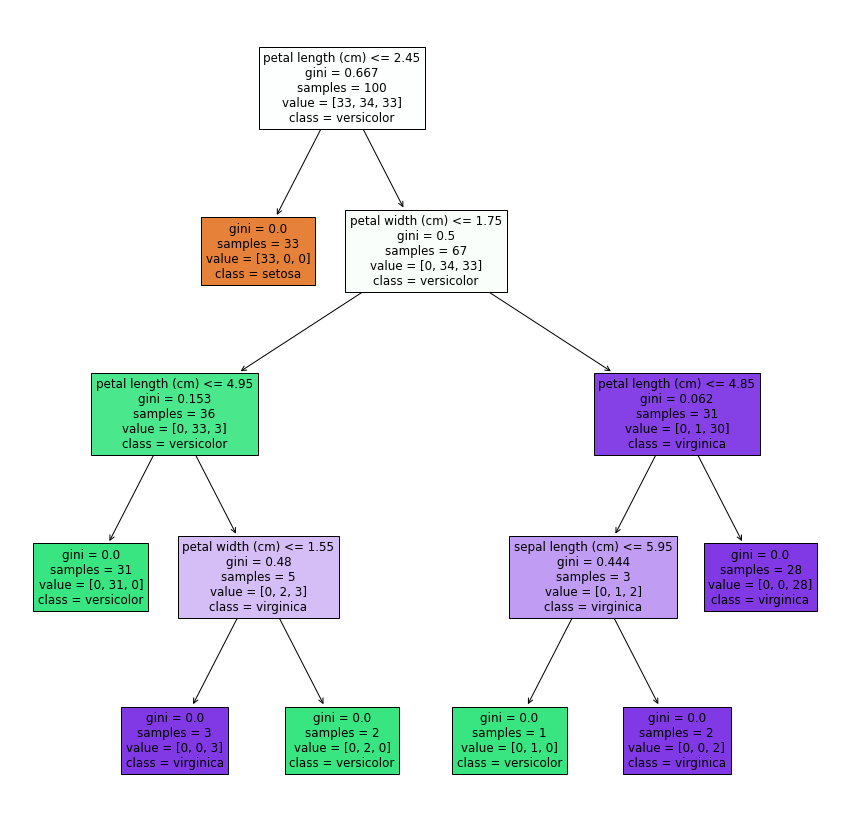

In [3]:
import numpy as np
# load iris dataset and split into train:test
iris = datasets.load_iris()
irisX = iris.data
irisy = iris.target

X_train, X_test, y_train, y_test = train_test_split(irisX, irisy, test_size=0.33,stratify=irisy)

model = DecisionTreeClassifier(random_state=1234)
model.fit(X_train,y_train)
ypred = model.predict(X_test)
confusionMatrix = np.zeros((3,3),int)
for i in range(50):
    actual = int(y_test[i])
    predicted = int(ypred[i])
    confusionMatrix[actual][predicted] += 1
print(confusionMatrix)



fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(model, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

## So how do  we learn models?
**Construction**:  add boundaries to make models more complex
- Add examples to kNN
- Repeatedly add nodes to trees, splitting on new variables
- Repeatedly add rules that classify as-yet unclassified data
 - Add nodes to an artifical neural network
 
**Perturbation**: Move existing boundaries to change model
- Change value of K or distance function in kNN
- Change rule/treenode thresholds: *if  exam < 40*  &rarr; *if exam < 38*
- Change operators in rules/ tree nodes:  *if exam < 38* &rarr; *if exam &leq; 38*
- Change variables considered in rules/tree nodes: *if exam < 38* &rarr; *if coursework < 38*
- Change weights in MLP, 


## Summary
Supervised Machine Learning is concerned with learning predictive models from datasets
- Different algorithms use different representations of decision boundaries
- inside the boundaries are:
 - **Class labels** for a classification problem
 - **(formulas leading to) continuous values** for a regression problem

Algorithms **fit** models to data by repeatedly:
  - making and testing small changes,  
  - and then selecting the ones that improve accuracy on the training set
  - until some stop criteria is met

  - They do this by either adding complexity or changing the parameters of an existing model
  - This is equivalent to moving through “model space”

Once the model has been learned (fit) we leave it unchanged  
  - and use it to **predict** the labels for new data points

Next week:   Neural Networks
